# **Rodrigo_Mesquita_DR1_TP2**
### **Inteligência Artificial: Model LifeCycle [24E1_1]**

# 1.Carregue o dataset "TP2_Penguins" para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:


In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
df_penguins = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/TP2_Penguins.csv')

### a.Elimine as variáveis "island", "sex" e "year".


In [ ]:
df_penguins = df_penguins.drop(['island', 'sex', 'year'], axis=1)

### b.Elimine observações que contenham dados ausentes (NA).


In [ ]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df_penguins = df_penguins.dropna()

### c.Transforme-o para que ele tenha apenas duas categorias-alvo, “Gentoo” e “No-Gentoo”.


In [ ]:
df_penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
mapeamento = {'Adelie': 'No-Gentoo', 'Gentoo': 'Gentoo', 'Chinstrap': 'No-Gentoo'}
df_penguins['species'] = df_penguins['species'] .map(mapeamento);
df_penguins['species'].unique()

array(['No-Gentoo', 'Gentoo'], dtype=object)

###d.Recodifique a variável-alvo para representar a categoria "Gentoo" como 1 e "No-Gentoo" como 0.


In [ ]:
mapeamento = {'Gentoo':1, 'No-Gentoo':0}
df_penguins['species'] = df_penguins['species'] .map(mapeamento);
df_penguins['species'].unique()

array([0, 1])

###e.Separe o dataframe resultante em Treino-Teste, utilizando a proporção 70-30%.

In [ ]:
x = df_penguins.drop(['species'], axis=1)
y = df_penguins['species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

# 2.A partir do dataframe totalmente transformado do item 1 aplique um modelo KNN, com K=3. Calcule a acurácia deste modelo.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)
score = np.mean(y_test.values.ravel() != y_pred)
acuracia = metrics.accuracy_score(y_test.values.ravel(),y_pred)

In [ ]:
print("score:",score)
print("acuracia:",acuracia)

score: 0.07766990291262135
acuracia: 0.9223300970873787


# 3.Execute novamente o modelo KNN, variando o parâmetro K entre os valores 3 e 50, utilizando apenas valores ímpares. Calcule a acurácia de cada uma das execuções e indique qual foi o modelo que teve melhor performance.


In [ ]:
valor_k = list(range(3,50,2))
score = []
acuracia = []
for k in valor_k:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train.values.ravel())
    y_pred = knn.predict(x_test)
    score.append(np.mean(y_test.values.ravel() != y_pred))
    acuracia.append(metrics.accuracy_score(y_test.values.ravel(),y_pred))


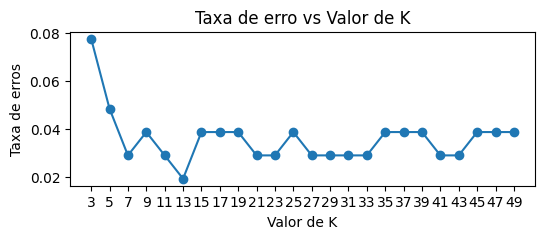

In [ ]:
plt.figure(figsize=(6, 2))
plt.plot(valor_k, score, marker='o')
plt.title('Taxa de erro vs Valor de K')
plt.ylabel('Taxa de erros')
plt.xlabel('Valor de K')
plt.xticks(valor_k)
plt.show()

In [ ]:
df_acuracia = pd.DataFrame({'k': valor_k, 'Acuracia': acuracia})
linha_maior_acuracia = df_acuracia.loc[df_acuracia['Acuracia'].idxmax()]
linha_maior_acuracia

k           13.000000
Acuracia     0.980583
Name: 5, dtype: float64

# 4.A tarefa agora é para utilizarmos o modelo KNN em um problema de regressão. Carregue o dataset “TP2_Diamonds” para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:


In [ ]:
df_diamond = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/TP2_Diamonds.csv')

###a.Elimine as variáveis "cut", "color" e "clarity".


In [ ]:
df_diamond = df_diamond.drop(['cut', 'color', 'clarity'], axis=1)

###b.Separe o dataframe resultante em Treino-Teste, utilizando a proporção 70-30%.


In [ ]:
x = df_diamond.drop(['price'], axis=1)
y = df_diamond['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

###c.Aplique um StandardScaler para padronizar as faixas de valores de todas as variáveis.


In [ ]:
scaler = StandardScaler()
scaler.fit(df_diamond)
df_diamond_sc = scaler.transform(df_diamond).copy()

###d.Execute o modelo KNN (agora configurado para regressão), variando o parâmetro K entre os valores 3 e 50, apenas para valores ímpares. Calcule a métrica RMSE de cada uma das execuções e indique qual foi o modelo que teve melhor performance.

In [ ]:
valor_k = list(range(3,50,2))
score = []
rmse = []
for k in valor_k:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train.values.ravel())
    y_pred = knn.predict(x_test)
    score.append(np.mean(y_test.values.ravel() != y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

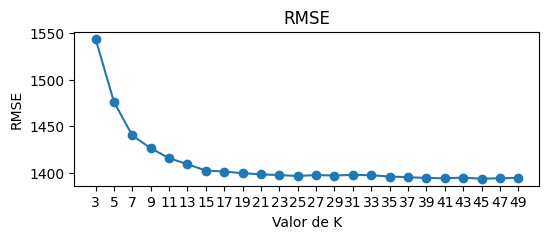

In [ ]:
plt.figure(figsize=(6, 2))
plt.plot(valor_k, rmse, marker='o')
plt.title('RMSE')
plt.ylabel('RMSE')
plt.xlabel('Valor de K')
plt.xticks(valor_k)
plt.show()

In [ ]:
df_rmse = pd.DataFrame({'k': valor_k, 'Rmse': rmse})
linha_menor_rmse = df_rmse.loc[df_rmse['Rmse'].idxmin()]
linha_menor_rmse

k         45.000000
Rmse    1393.471529
Name: 21, dtype: float64